In [1]:
import numpy as np, matplotlib.pyplot as plt, os

In [2]:
import matplotlib.colors as cl

In [3]:
import scipy.io as sio

In [4]:
cwd = os.getcwd()

In [5]:
Pavia_scene_dir = os.path.join(cwd, "MAT Files", "Pavia.mat")

In [6]:
PaviaSc_gt_dir = os.path.join(cwd, "GT Files", "Pavia_gt.mat")

In [7]:
print(Pavia_scene_dir)

/Users/suhasmathey/Hyper_Spectral Imaging/Hyper-Spectral-Image-Analysis/MAT Files/Pavia.mat


In [8]:
PaviaSc_data_mat = sio.loadmat(Pavia_scene_dir)

In [9]:
PaviaSc_gt_mat = sio.loadmat(PaviaSc_gt_dir)


## Pavia - Ground Truth Data

In [10]:
PaviaSc_gt_mat['pavia_gt'].astype(np.float64)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Pavia Data Matrix

In [11]:
PaviaSc_data_mat['pavia'].astype(np.float64)

array([[[ 854.,  601.,  350., ..., 3664., 3636., 3643.],
        [ 527.,  642.,  575., ..., 3834., 3725., 3768.],
        [ 374.,  322.,  179., ..., 4318., 4311., 4321.],
        ...,
        [ 367.,  432.,  461., ..., 2582., 2504., 2512.],
        [ 261.,  311.,  366., ..., 2269., 2174., 2163.],
        [1059.,  678.,  403., ..., 2245., 2135., 2136.]],

       [[1060.,  909.,  596., ..., 2963., 2967., 2974.],
        [ 707.,  757.,  646., ..., 3508., 3534., 3648.],
        [ 143.,  419.,  417., ..., 4650., 4612., 4638.],
        ...,
        [ 465.,  547.,  537., ..., 3156., 3052., 3035.],
        [ 884.,  615.,  401., ..., 2792., 2667., 2639.],
        [ 756.,  401.,  213., ..., 2600., 2484., 2445.]],

       [[ 532.,  545.,  594., ..., 1675., 1653., 1680.],
        [ 523.,  491.,  321., ..., 3339., 3349., 3403.],
        [ 816.,  681.,  369., ..., 4627., 4600., 4650.],
        ...,
        [ 408.,  539.,  436., ..., 3099., 3005., 3006.],
        [ 393.,  447.,  476., ..., 3172., 304

In [12]:
data = PaviaSc_data_mat['pavia']

In [13]:
gt_data = PaviaSc_gt_mat['pavia_gt']

In [14]:
indices = np.where(gt_data == 0)

In [15]:
bg_indices = list(zip(indices[0], indices[1]))

**Create a mask to remove the background pixels**

In [16]:
mask = gt_data != 0 

In [17]:
masked_data = data[mask, :].T

In [18]:
data.shape

(1096, 715, 102)

In [19]:
masked_data.shape

(102, 148152)

In [20]:
n_classes = np.max(gt_data) + 1

### Custom Colormap

In [25]:
colors_10 = ["#000000", "#FFFF74", "#FF9BFF", "#00D3FF", "#E2630D", "#007E00", "#0050E6", "#AC0047", "#00FFC8", "#006468"]

In [26]:
my_c10map = cl.ListedColormap(colors_10, name="disti_c10map")

In [27]:
plt.colormaps.register(cmap=my_c10map)

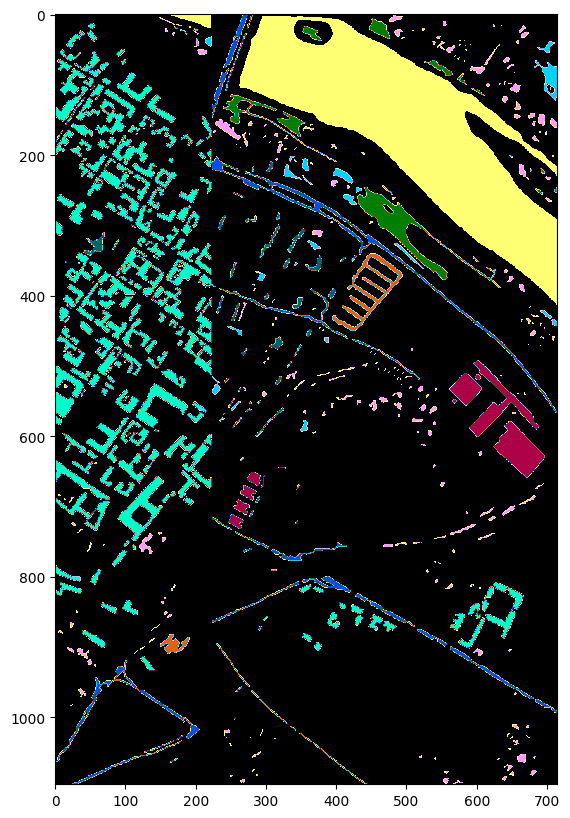

In [28]:
plt.figure(figsize=(10, 10))
plt.imshow(gt_data, cmap=my_c10map)
plt.show()

In [29]:
data.shape[0]

1096

In [30]:
data_mat = data.reshape(-1, data.shape[2]).T

In [31]:
data_mat.shape

(102, 783640)

In [32]:
gt_vec = gt_data.flatten()

In [33]:
np.sort(np.unique(gt_vec))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
indices = np.where(gt_vec == 1)[0]

In [35]:
len(indices)

65971

In [36]:
indices[1]

162

In [37]:
rand_idx1 = np.random.choice(indices, 300, False)

In [38]:
len(rand_idx1)

300

In [39]:
rand_idx1

array([ 59734, 220897, 145719,  98378, 102820,  40351, 139934,  86340,
       109813, 106322, 202962,  87734,  71919,  90488, 180786, 161470,
       220134,  59104,  73250, 195751,  48373, 114181, 235880, 168672,
        78338,  79938, 172917, 211501, 117197, 162876,  55503,  59671,
       162849, 193679,  93539, 149319,   6017,  57500,  27623, 203026,
        22473, 107813,  95609, 210175, 158724, 102030,  43959,  50462,
       252370, 210200, 255930, 274557, 229487,  82631,  56053,  89911,
       115671,  92829, 226594,  89928, 112715,  12365, 109114, 172124,
        46794, 145725,  91926, 126414, 135634, 157916,  70599, 227357,
        97629,  43267, 167854,  68467, 219473, 185746, 183569,  84202,
       245900, 283852,  66159,  72601, 163540, 177178,  64106,  51212,
       101258, 159368,  80572,  37463, 193670, 125060,  76239,  98493,
        55388, 215794, 230130,  66907, 112897, 175703, 176499, 174266,
        86863, 142885,   8873, 107789, 206611, 135604, 145759, 178597,
      

In [40]:
selec_data = data_mat[:, rand_idx1]

In [41]:
selec_data.shape

(102, 300)

In [42]:
mean_vector = np.mean(selec_data, axis=1)

In [43]:
mean_vector.shape

(102,)

## Mean Classifier

In [44]:
class MeanClassifier:
    def __init__(self, mean_vectors):

        """
        Parameters:
            mean_vectors: List containing the mean vector for each valid label.
        """
        
        self.mean_vectors = mean_vectors

In [45]:
def fit_mean(data, gt_data):

    """
    Parameters:
        data: A 3D array of shape (height, width, bands) representing the data cube
        gt_data: A 2D array of shape (height, width) representing the ground truth labels, 0 reperesenting the background

    Returns:
        MeanClassifier: An instance of MeanClassifier with computed mean vectors
    """

    data_mat = data.reshape(-1, data.shape[2]).T
    gt_vec = gt_data.flatten()
    gt_labels = np.sort(np.unique(gt_vec))
    valid_labels = gt_labels[gt_labels != 0]

    mean_vectors = []
    for label in valid_labels:
        indices = np.where(gt_vec == label)[0]

        idx_size = min(3000, len(indices))

        selected_indices = np.random.choice(indices, idx_size, False)
        selected_points = data_mat[:, selected_indices]

        mean_vector = np.mean(selected_points, axis=1)
        mean_vectors.append(mean_vector)

    return MeanClassifier(mean_vectors)

In [46]:
mean_classifier = fit_mean(data, gt_data)

In [47]:
mean_classifier.mean_vectors[1]

array([ 540.88066667,  456.34166667,  365.43366667,  315.432     ,
        295.64366667,  292.896     ,  296.15766667,  291.25166667,
        283.76566667,  276.36      ,  269.40333333,  258.37833333,
        250.347     ,  244.51166667,  239.02933333,  231.77366667,
        231.45633333,  234.70933333,  240.011     ,  249.853     ,
        265.48433333,  289.14433333,  315.85133333,  345.63266667,
        381.808     ,  418.62066667,  443.89166667,  460.17633333,
        470.799     ,  481.93233333,  492.02833333,  494.46733333,
        487.59766667,  475.92433333,  459.042     ,  437.201     ,
        413.76266667,  394.10166667,  379.64933333,  369.54833333,
        360.05333333,  351.433     ,  346.122     ,  342.032     ,
        337.75733333,  331.15333333,  321.59      ,  312.46433333,
        307.742     ,  303.409     ,  301.948     ,  300.243     ,
        295.30466667,  288.13933333,  277.915     ,  267.90233333,
        259.40966667,  249.54666667,  239.02533333,  229.802  

In [48]:
def classify(data, classifier):
    """
    Parameters:
        data: A 2D array of shape (bands, n_pixels), where each column is a pixel
        classifier: An object with attribute 'mean_vectors', a list of 1D numpy arrays
        
    Returns:
        pixel_classes: A 1D array of length n_pixels containing predicted pixel labels 
    """

    Dnorms = np.sum(np.square(data), axis=0)
    resids = []
    for Uc in classifier.mean_vectors:
        innerprod = np.dot(data.T, Uc)
        Uc_norm = np.sum(np.square(Uc), axis=0)

        distances = np.sqrt(np.abs(Dnorms - 2 * innerprod + Uc_norm))
        resids.append(distances)


    resids = np.array(resids)
    pixel_classes = np.argmin(resids, axis=0) + 1

    return pixel_classes

In [49]:
mean_class_labels = classify(masked_data, mean_classifier)

In [50]:
np.unique(mean_class_labels)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
mean_class_labels.shape

(148152,)

In [52]:
clustermap = np.zeros(data.shape[:2])

In [53]:
clustermap[mask] = mean_class_labels

In [54]:
np.unique(clustermap)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [55]:
clustermap.shape

(1096, 715)

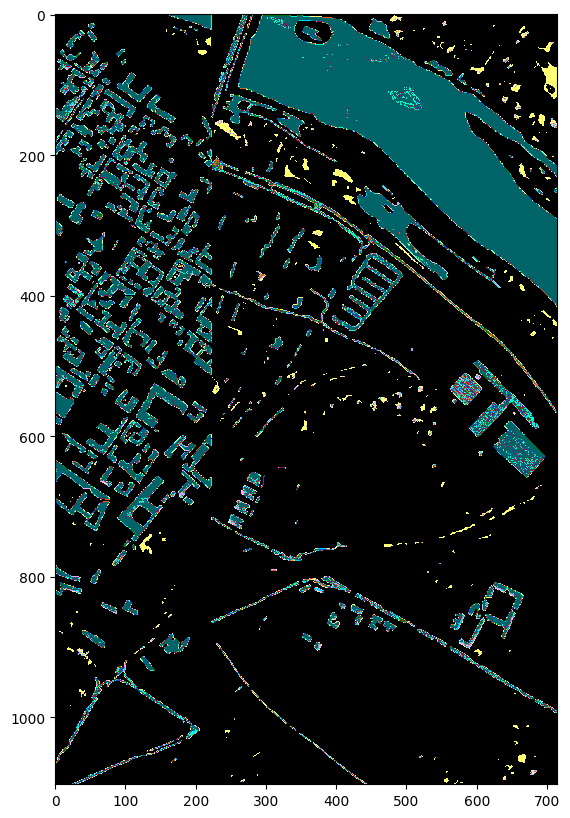

In [56]:
plt.figure(figsize=(10, 10))
plt.imshow(clustermap, cmap=my_c10map)
plt.show()